# Project3

In [1]:
import re
import pandas as pd

In [2]:
# open file
f1 = open(r"./data/tournamentinfo.txt")
lines = f1.readlines()      #read all line of txt

# to store player's information
lst = [] # [player A's 1s line, player 1's 2nd line, ... player X's 1s line, player X's 2nd line]
j = 0
for line in lines:
    # to skip the '------' line
    mod3 = j % 3
    
    # to skip the 3 head line
    if j > 2:
        inners = []
        if mod3 == 1:
            # 1st line of same player 
            lst.append(line)
        elif mod3 == 2:
            # 2nd line of same player
            lst.append(line)
    
    j = j + 1

In [3]:
# print length of lst
size = len(lst)
size

128

In [4]:
# 2 line can describe one player
step = 2

player_2_lines = [lst[i:i + step] for i in range(0, len(lst), step)]

# player_2_lines is [player A's 1s line, player 1's 2nd line, ... player X's 1s line, player X's 2nd line]
player_2_lines[0]

['    1 | GARY HUA                        |6.0  |W  39|W  21|W  18|W  14|W   7|D  12|D   4|\n',
 '   ON | 15445895 / R: 1794   ->1817     |N:2  |W    |B    |W    |B    |W    |B    |W    |\n']

End of read file. To get a data list. Then to fetch information.

# task 1
- get paly number, play name, total point, then put into dataframe of pandas, then export to a csv file.

One player's 1st line is 

 data: 1 | GARY HUA                        |6.0  |W  39|W  21|W  18|W  14|W   7|D  12|D   4|\n
 
 index: 0 | 1 |  2 |  3 |  4 |  5 | 6 |  7 |  8 |  9 |  10 | 
 
 After spliting by |. 
 
 index of 0 is player number
 index of 1 is player name
 index of 2 is player' total points

In [5]:
all_play = []
# player_2_lines is [player A's 1s line, player 1's 2nd line, ... player X's 1s line, player X's 2nd line]
for player in player_2_lines:
    line_1 = player[0] # one player's 1st line
    line_2 = player[1] # one player's 2nd line
    
    # split 1st line by |
    line_1_list = re.split('\|', line_1)
    
    # get player number
    player_num = line_1_list[0].strip()
    
    # get player name
    player_name = line_1_list[1].strip()
    
    # get player's total pints
    player_total_points = line_1_list[2].strip()
    
    p = [player_num, player_name, player_total_points]
    
    # append to a list
    all_play.append(p)

In [6]:
# put into a pandas with column name
df = pd.DataFrame(all_play, columns=['player_num', 'player_name', 'total_points'])
df

,player_num,player_name,total_points
0,1,GARY HUA,6.0
1,2,DAKSHESH DARURI,6.0
2,3,ADITYA BAJAJ,6.0
3,4,PATRICK H SCHILLING,5.5
4,5,HANSHI ZUO,5.5
...,...,...,...
59,60,JULIA SHEN,1.5
60,61,JEZZEL FARKAS,1.5
61,62,ASHWIN BALAJI,1.0
62,63,THOMAS JOSEPH HOSMER,1.0


In [7]:
# write into csv
df.to_csv('./data/chess_first_3_columns.csv', index=False)

To open the chess_first_3_columns.csv

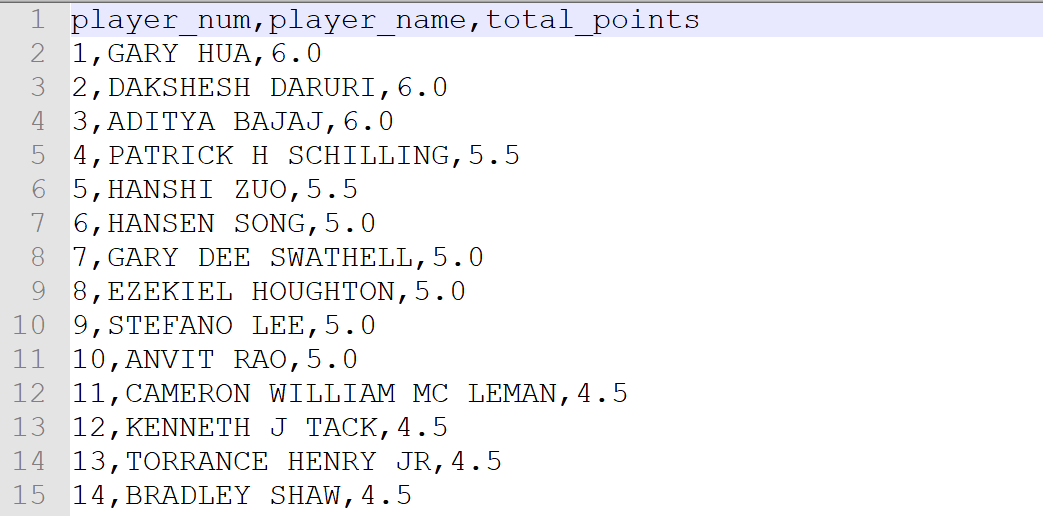

# task 1 ---- end

# task 2
- process the information from the second line for each player: state and pre-tournament rating. 

- One player's 1st line is 

 data: 1 | GARY HUA                        |6.0  |W  39|W  21|W  18|W  14|W   7|D  12|D   4|\n
 
 index: 0 | 1 |  2 |  3 |  4 |  5 | 6 |  7 |  8 |  9 |  10 | 
 
 After spliting by |. 
 
 index of 0 is player number
 index of 1 is player name
 index of 2 is player' total points


- One player's 2nd line is 

 data:  ON | 15445895 / R: 1794   ->1817     |N:2  |W    |B    |W    |B    |W    |B    |W    |\n
 
 index: 0 | 1 |  2 |  3 |  4 |  5 | 6 |  7 |  8 |  9 |  10 | 
 
 After spliting by |. 
 
 index of 0 is player's state
 index of 1 is player's USCF ID / Rtg (Pre->Post).
 
 Using regex to find USCF ID, Pre Rtg, Post Rtg

In [8]:
player_2_lines[0]

['    1 | GARY HUA                        |6.0  |W  39|W  21|W  18|W  14|W   7|D  12|D   4|\n',
 '   ON | 15445895 / R: 1794   ->1817     |N:2  |W    |B    |W    |B    |W    |B    |W    |\n']

In [9]:
# Using 4 groups to get ID, R, Pre Rtg, Post Rtg
pattern_pre_rating = r'([\d]+)\s*\/\s*(R:)\s*([\d\w]+)\s*\-\>\s*([\d\w]+)'

# compile pattern
regex_pre_rating = re.compile(pattern_pre_rating)

# test the pattern
regex_pre_rating.findall('15771592 / R:  955P11-> 979P18')

[('15771592', 'R:', '955P11', '979P18')]

For example:

regex_pre_rating.findall('15445895 / R: 1794   ->1817') ----> [('15445895', 'R:', '1794', '1817')]

regex_pre_rating.findall('15771592 / R:  955P11-> 979P18') ----> [('15771592', 'R:', '955P11', '979P18')]

In [10]:
# to get digits from 1076P10 or 1076
pattern_pre_p_level = r'([\d]+)'

regex_pre_p_level = re.compile(pattern_pre_p_level)

# test the pattern
regex_pre_p_level.findall('955P11')

['955', '11']

For example:

regex_pre_p_level.findall('955P11') -> ['955', '11']

regex_pre_p_level.findall('1076') - > ['1076']


In [11]:
# 15445895 / R: 1794   ->1817
def split_pre_tournament_rating(regex_pre_rating, regex_pre_p_level, rating_ori):
    """
    To get player's ID, Pre Rtg, Post Rtg.

    regex_pre_rating:
      re.compile: r'([\d]+)\s*\/\s*(R:)\s*([\d\w]+)\s*\-\>\s*([\d\w]+)'
      
    regex_pre_p_level:
      re.compile: r'([\d]+)'.
      
    rating_ori:
      one player's (index = 1) of 2nd line: '15771592 / R: 955P11-> 979P18'

    Returns:
      result_rating, result_p_level: One player's Pre Rtg, P-level

    Raises:
      none
    
    For example: 
        input: '15771592 / R: 955P11-> 979P18'
        return: 955, 11
      
    """
    
    result_rating = 0
    result_p_level = ''
    
    # Using regex to get 4 groups data from '15771592 / R: 955P11-> 979P18'
    rating_lst = regex_pre_rating.findall(rating_ori)

    if len(rating_lst) > 0: # [('15771592', 'R:', '955P11', '979P18')]
        
        rating_tupe = rating_lst[0] # Get the 1st tupe from list: ('15771592', 'R:', '955P11', '979P18')
        
        pre_str = rating_tupe[2] # Get the index = 2 of tupe: 955P11
        
        # Using r'([\d]+)' to get pre Rtg. and P-level.
        pre_and_p_level = regex_pre_p_level.findall(pre_str)

        # it has P-level
        if len(pre_and_p_level) > 1: # ['955', '11']
            
            # Pre Rtg.
            result_rating = pre_and_p_level[0]
            
            # P-level
            result_p_level = pre_and_p_level[1]
        
        # it has only Pre Rtg
        elif len(pre_and_p_level) == 1: # ['1794']
            
            # Pre Rtg
            result_rating = pre_and_p_level[0]
    
    # return Pre Rtg, P-level
    return result_rating, result_p_level

In [12]:
all_play_2 = []
for player in player_2_lines:
    line_1 = player[0] # one player's 1st line
    line_2 = player[1] # one player's 2nd line
    

    # split line 1 by |
    line_1_list = re.split('\|', line_1)
    
    # player's number
    player_num = line_1_list[0].strip()
    
    # player's name
    player_name = line_1_list[1].strip()
    
    # player's total points
    player_total_points = line_1_list[2].strip()
    
    # split line 2 by |
    line_2_list = re.split('\|', line_2)
    
    # player's state
    player_state = line_2_list[0].strip()
    
    # player's '15771592 / R: 955P11-> 979P18'
    pre_tournament_rating_ori = line_2_list[1].strip()
    
    # Using regex to find player's Pre Rtg and P-level
    pre_point, pre_p_level = split_pre_tournament_rating(regex_pre_rating, regex_pre_p_level, pre_tournament_rating_ori)
    
    # create a list, input player's data into the list
    pp = [player_num, player_name, player_total_points, player_state, pre_point]
    
    # add to all players list
    all_play_2.append(pp)

In [13]:
# put into a pandas with column name
df2 = pd.DataFrame(all_play_2, columns=['player_num', 'player_name', 'total_points', 'player_state', 'pre_point'])
df2

,player_num,player_name,total_points,player_state,pre_point
0,1,GARY HUA,6.0,ON,1794
1,2,DAKSHESH DARURI,6.0,MI,1553
2,3,ADITYA BAJAJ,6.0,MI,1384
3,4,PATRICK H SCHILLING,5.5,MI,1716
4,5,HANSHI ZUO,5.5,MI,1655
...,...,...,...,...,...
59,60,JULIA SHEN,1.5,MI,967
60,61,JEZZEL FARKAS,1.5,ON,955
61,62,ASHWIN BALAJI,1.0,MI,1530
62,63,THOMAS JOSEPH HOSMER,1.0,MI,1175


In [14]:
# write into csv
df2.to_csv('./data/chess_first_5_columns.csv', index=False)

To see the chess_first_5_columns.csv

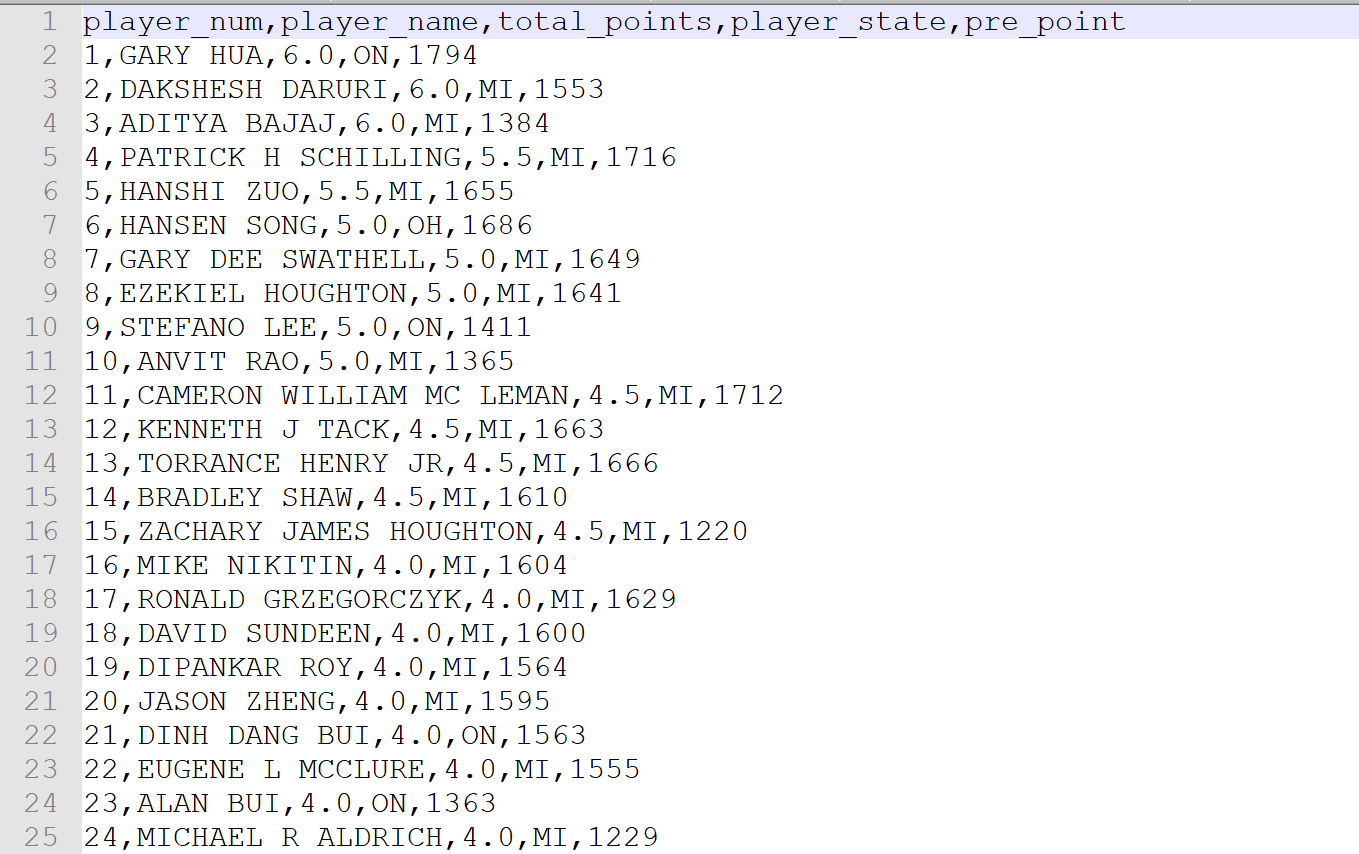

# task 2 ---- end